In [1]:
import pandas as pd

# Load the dataset
file_path = 'footballScores.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Season,Date,Time,League,Home Team,Away Team,Betfair Odds Home,Betfair Odds Draw,Betfair OddsAway,FTS Odds Home,...,Away.2,Home Pinn Diff,Draw Pinn Diff,Away Pinn Diff,Pinn Home BACK,Pinn Draw BACK,Pinn Away BACK,Pinn Home LAY,Pinn Draw LAY,Pinn Away LAY
0,2012/2013,"Saturday, August 18, 2012",3:00:00 PM,English Premier League,Arsenal,Sunderland,1.43,4.90,9.80,1.31,...,8.71,-0.49,0.78,1.28,-1.00,3.65,-1.00,0.98,-3.72,0.98
1,2012/2013,"Saturday, August 18, 2012",12:00:00 AM,English Premier League,Fulham,Norwich,1.87,3.80,4.80,1.52,...,4.75,0.87,0.35,0.22,0.82,-1.00,-1.00,-0.84,0.98,0.98
2,2012/2013,"Saturday, August 18, 2012",12:00:00 AM,English Premier League,QPR,Swansea,2.06,3.55,4.10,2.62,...,4.15,1.46,0.16,-0.29,-1.00,-1.00,3.09,0.98,0.98,-3.15
3,2012/2013,"Saturday, August 18, 2012",12:00:00 AM,English Premier League,Reading,Stoke,2.44,3.40,3.35,2.70,...,3.22,-0.50,0.89,1.21,-1.00,2.25,-1.00,0.98,-2.30,0.98
4,2012/2013,"Saturday, August 18, 2012",12:00:00 AM,English Premier League,West Brom,Liverpool,4.30,3.70,1.98,2.82,...,1.84,-2.25,-0.29,3.84,3.68,-1.00,-1.00,-3.76,0.98,0.98


# pre processing and data cleaning

In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

# Display dataset information
dataset_info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15906 entries, 0 to 15905
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             15906 non-null  object 
 1   Date               15906 non-null  object 
 2   Time               15906 non-null  object 
 3   League             15906 non-null  object 
 4   Home Team          15906 non-null  object 
 5   Away Team          15906 non-null  object 
 6   Betfair Odds Home  15906 non-null  float64
 7   Betfair Odds Draw  15906 non-null  float64
 8   Betfair OddsAway   15906 non-null  float64
 9   FTS Odds Home      15906 non-null  float64
 10  FTS Odds Draw      15906 non-null  float64
 11  FTS Odds Away      15906 non-null  float64
 12  Home Difference    15906 non-null  float64
 13  Draw Difference    15906 non-null  float64
 14  Away Difference    15906 non-null  float64
 15  HT Score Home      15904 non-null  float64
 16  HT Score Away      159

In [3]:
def custom_date_parser(date):
    try:
        return pd.to_datetime(date, errors='coerce')  # Coerce errors will set invalid dates to NaT
    except ValueError:
        return pd.NaT  # Return 'Not a Time' for unparseable formats

df['Date'] = df['Date'].apply(custom_date_parser)


In [4]:
# Display unique date values - modify as needed if the dataset is too large
unique_dates = df['Date'].unique()
unique_dates


array(['2012-08-18T00:00:00.000000000', '2012-08-19T00:00:00.000000000',
       '2012-08-20T00:00:00.000000000', ...,
       '2022-05-20T00:00:00.000000000', '2022-05-21T00:00:00.000000000',
       '2022-05-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [5]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time


In [6]:
# For numerical columns, you can fill with mean/median
df['HT Score Home'].fillna(df['HT Score Home'].mean(), inplace=True)
df['HT Score Away'].fillna(df['HT Score Away'].mean(), inplace=True)

# Drop 'Unnamed: 38' as it's entirely null
df.drop(columns=['Unnamed: 38'], inplace=True)


In [7]:
# Check and remove duplicate rows if any
duplicate_rows = df.duplicated().sum()
df = df.drop_duplicates()


In [8]:
# Imputation
df['Ave'].fillna(df['Ave'].mean(), inplace=True)
df['Ave.1'].fillna(df['Ave.1'].mean(), inplace=True)



In [9]:
df = df.drop_duplicates()


In [10]:
df.head()

,Season,Date,Time,League,Home Team,Away Team,Betfair Odds Home,Betfair Odds Draw,Betfair OddsAway,FTS Odds Home,...,Away.2,Home Pinn Diff,Draw Pinn Diff,Away Pinn Diff,Pinn Home BACK,Pinn Draw BACK,Pinn Away BACK,Pinn Home LAY,Pinn Draw LAY,Pinn Away LAY
0,2012/2013,2012-08-18,15:00:00,English Premier League,Arsenal,Sunderland,1.43,4.90,9.80,1.31,...,8.71,-0.49,0.78,1.28,-1.00,3.65,-1.00,0.98,-3.72,0.98
1,2012/2013,2012-08-18,00:00:00,English Premier League,Fulham,Norwich,1.87,3.80,4.80,1.52,...,4.75,0.87,0.35,0.22,0.82,-1.00,-1.00,-0.84,0.98,0.98
2,2012/2013,2012-08-18,00:00:00,English Premier League,QPR,Swansea,2.06,3.55,4.10,2.62,...,4.15,1.46,0.16,-0.29,-1.00,-1.00,3.09,0.98,0.98,-3.15
3,2012/2013,2012-08-18,00:00:00,English Premier League,Reading,Stoke,2.44,3.40,3.35,2.70,...,3.22,-0.50,0.89,1.21,-1.00,2.25,-1.00,0.98,-2.30,0.98
4,2012/2013,2012-08-18,00:00:00,English Premier League,West Brom,Liverpool,4.30,3.70,1.98,2.82,...,1.84,-2.25,-0.29,3.84,3.68,-1.00,-1.00,-3.76,0.98,0.98


In [11]:
summary_stats = df.describe()
summary_stats

,Betfair Odds Home,Betfair Odds Draw,Betfair OddsAway,FTS Odds Home,FTS Odds Draw,FTS Odds Away,Home Difference,Draw Difference,Away Difference,HT Score Home,...,Away.2,Home Pinn Diff,Draw Pinn Diff,Away Pinn Diff,Pinn Home BACK,Pinn Draw BACK,Pinn Away BACK,Pinn Home LAY,Pinn Draw LAY,Pinn Away LAY
count,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,15906.000000,...,15902.000000,15902.000000,15902.000000,15902.000000,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000,15905.000000
mean,2.975968,4.334462,5.264247,3.012984,5.084292,5.845529,0.306523,-0.336198,-0.902394,0.693913,...,5.064735,0.536200,0.357668,0.384349,-0.030057,-0.050274,-0.052732,0.008529,0.020844,0.025763
std,2.393522,1.751880,5.548171,2.722890,3.533073,7.220145,11.449892,8.502643,10.277103,0.850022,...,4.817029,2.999173,1.485849,2.799639,1.360471,1.747706,1.917898,1.372381,1.766835,1.943130
min,1.050000,1.550000,1.100000,1.000000,1.250000,1.050000,-59.080000,-40.710000,-51.790000,0.000000,...,1.080000,-23.870000,-32.970000,-22.470000,-1.000000,-1.000000,-1.000000,-24.830000,-18.860000,-31.320000
25%,1.710000,3.500000,2.460000,1.700000,3.220000,2.500000,-6.760000,-5.970000,-7.090000,0.000000,...,2.410000,-1.280000,-0.460000,-1.190000,-1.000000,-1.000000,-1.000000,-0.750000,0.980000,-0.610000
50%,2.260000,3.750000,3.550000,2.240000,4.000000,3.780000,0.400000,-0.470000,-0.710000,0.000000,...,3.540000,0.520000,0.360000,0.390000,-1.000000,-1.000000,-1.000000,0.980000,0.980000,0.980000
75%,3.200000,4.500000,5.700000,3.200000,5.500000,6.000000,7.500000,4.827500,5.230000,1.000000,...,5.650000,2.340000,1.190000,1.960000,0.740000,-1.000000,0.600000,0.980000,0.980000,0.980000
max,38.000000,36.000000,75.000000,55.000000,65.000000,175.000000,53.030000,51.010000,52.010000,6.000000,...,51.000000,29.580000,10.820000,28.330000,24.330000,18.480000,30.690000,0.980000,0.980000,0.980000


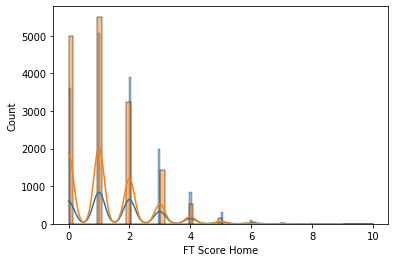

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['FT Score Home'], kde=True)
sns.histplot(df['FT Score Away'], kde=True)
plt.show()


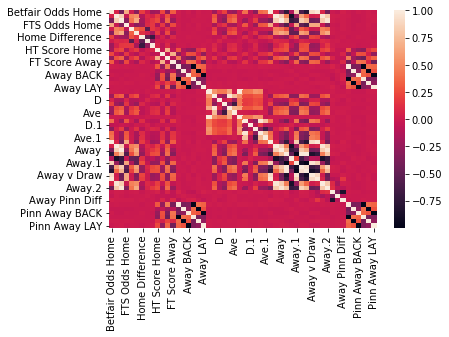

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()


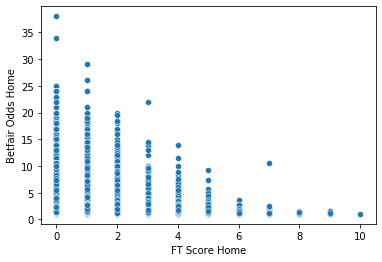

In [14]:
sns.scatterplot(x='FT Score Home', y='Betfair Odds Home', data=df)
plt.show()


In [15]:
# Assuming 'Date' is already converted to datetime
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday


In [16]:
df['Home Team Wins'] = df.apply(lambda x: 1 if x['FT Score Home'] > x['FT Score Away'] else 0, axis=1)
df['Away Team Wins'] = df.apply(lambda x: 1 if x['FT Score Away'] > x['FT Score Home'] else 0, axis=1)


In [17]:
df['Implied Probability Home Win'] = 1 / df['Betfair Odds Home']
df['Implied Probability Draw'] = 1 / df['Betfair Odds Draw']
df['Implied Probability Away Win'] = 1 / df['Betfair OddsAway ']


In [18]:
# Initialize columns for historical statistics
df['HomeTeamWinStreak'] = 0
df['AwayTeamWinStreak'] = 0
df['HomeTeamGoalsScored'] = 0
df['AwayTeamGoalsScored'] = 0
df['HomeTeamGoalsConceded'] = 0
df['AwayTeamGoalsConceded'] = 0

# Define a dictionary to keep track of team statistics
teams_stats = {}

for i, row in df.iterrows():
    home_team = row['Home']
    away_team = row['Away']
    
    # Initialize the team stats if not already done
    if home_team not in teams_stats:
        teams_stats[home_team] = {'WinStreak': 0, 'GoalsScored': 0, 'GoalsConceded': 0}
    if away_team not in teams_stats:
        teams_stats[away_team] = {'WinStreak': 0, 'GoalsScored': 0, 'GoalsConceded': 0}
    
    # Get historical stats for the teams involved in the match
    df.at[i, 'HomeTeamWinStreak'] = teams_stats[home_team]['WinStreak']
    df.at[i, 'AwayTeamWinStreak'] = teams_stats[away_team]['WinStreak']
    df.at[i, 'HomeTeamGoalsScored'] = teams_stats[home_team]['GoalsScored']
    df.at[i, 'AwayTeamGoalsScored'] = teams_stats[away_team]['GoalsScored']
    df.at[i, 'HomeTeamGoalsConceded'] = teams_stats[home_team]['GoalsConceded']
    df.at[i, 'AwayTeamGoalsConceded'] = teams_stats[away_team]['GoalsConceded']
    
    # Update team stats
    if row['FT Score Home'] > row['FT Score Away']:
        teams_stats[home_team]['WinStreak'] += 1
        teams_stats[away_team]['WinStreak'] = 0
    elif row['FT Score Home'] < row['FT Score Away']:
        teams_stats[away_team]['WinStreak'] += 1
        teams_stats[home_team]['WinStreak'] = 0
    else:
        teams_stats[home_team]['WinStreak'] = 0
        teams_stats[away_team]['WinStreak'] = 0
        
    teams_stats[home_team]['GoalsScored'] += row['FT Score Home']
    teams_stats[home_team]['GoalsConceded'] += row['FT Score Away']
    teams_stats[away_team]['GoalsScored'] += row['FT Score Away']
    teams_stats[away_team]['GoalsConceded'] += row['FT Score Home']


In [19]:
list(df)

['Season',
 'Date',
 'Time',
 'League',
 'Home Team',
 'Away Team',
 'Betfair Odds Home',
 'Betfair Odds Draw',
 'Betfair OddsAway ',
 'FTS Odds Home',
 'FTS Odds Draw',
 'FTS Odds Away ',
 'Home Difference',
 'Draw Difference',
 'Away Difference',
 'HT Score Home',
 'HT Score Away',
 'FT Score Home',
 'FT Score Away',
 'FT1X2',
 'Home BACK',
 'Draw BACK',
 'Away BACK',
 'Home LAY',
 'Draw LAY',
 'Away LAY',
 'GP',
 'W',
 'D',
 'L',
 'Pts',
 'Ave',
 'GP.1',
 'W.1',
 'D.1',
 'L.1',
 'Pts.1',
 'Ave.1',
 'Colour Index',
 'Colour Index.1',
 'Home',
 'Draw',
 'Away',
 'Home.1',
 'Draw.1',
 'Away.1',
 'Home  v Draw',
 'Home v Away',
 'Away v Draw',
 'Home.2',
 'Draw.2',
 'Away.2',
 'Home Pinn Diff',
 'Draw Pinn Diff',
 'Away Pinn Diff',
 'Pinn Home BACK',
 'Pinn Draw BACK',
 'Pinn Away BACK',
 ' Pinn Home LAY',
 'Pinn Draw LAY',
 'Pinn Away LAY',
 'Year',
 'Month',
 'Day',
 'Weekday',
 'Home Team Wins',
 'Away Team Wins',
 'Implied Probability Home Win',
 'Implied Probability Draw',
 'Implie

In [20]:
# Convert season to the start year (or end year, depending on your preference)
df['Season'] = df['Season'].apply(lambda x: int(x.split('/')[0]))


In [21]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract parts of the dates
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame

# Define features and target
exclude_columns = ['Date', 'Time', 'FT1X2', 'Colour Index', 'Colour Index.1']  # Non-numeric and target columns
X = df.drop(columns=exclude_columns + ['Home BACK', 'Draw BACK', 'Away BACK'])  # Exclude target variables for X
y_home_back = df['Home BACK']  # Target variable

# Handle NaN and infinite values in features
X = X.select_dtypes(include=[np.number])  # Select only numeric columns
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
X.fillna(X.mean(), inplace=True)  # Fill NaN with column mean

# Handle NaN and infinite values in the target
y_home_back.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
y_home_back.fillna(y_home_back.mean(), inplace=True)  # Fill NaN with mean

# Split the dataset into training and test sets
X_train, X_test, y_train_home_back, y_test_home_back = train_test_split(X, y_home_back, test_size=0.3, random_state=42)

# Ensure no NaN or infinite values are present in the numeric columns
assert not X_train.isnull().values.any(), "NaN values found in X_train"
assert not np.isinf(X_train.values).any(), "Infinite values found in X_train"

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
bestfeatures_home_back = SelectKBest(score_func=f_classif, k='all')  # 'all' to select based on all features
fit_home_back = bestfeatures_home_back.fit(X_train_scaled, y_train_home_back)

# Extract feature scores
dfscores_home_back = pd.DataFrame(fit_home_back.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Combine the scores and columns into a single DataFrame
featureScores_home_back = pd.concat([dfcolumns, dfscores_home_back], axis=1)
featureScores_home_back.columns = ['Feature', 'Score']  # Naming the dataframe columns

# Sort the DataFrame by the Score in descending order
featureScores_home_back = featureScores_home_back.sort_values(by='Score', ascending=False)

# Print the sorted feature scores
print(featureScores_home_back)


           Feature         Score
54  Home Team Wins  3.903913e+16
14        Home LAY  1.875941e+08
44  Pinn Home BACK  4.533066e+03
47   Pinn Home LAY  4.436531e+03
31            Away  2.153485e+02
..             ...           ...
25             D.1  9.416842e-01
51           Month  9.168513e-01
23            GP.1  8.844112e-01
17              GP  8.748588e-01
53         Weekday  7.468171e-01

[65 rows x 2 columns]


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train_home_back)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_home_back, y_pred)
r2 = r2_score(y_test_home_back, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 3.7102209446108507e-06
R^2 Score: 0.9999980835547089


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Ensure your features and target variable are correctly defined and preprocessed
X_scaled = scaler.fit_transform(X)  # Assuming X is already defined and excludes any target or leaky features
y_home_back = df['Home BACK']       # Assuming y_home_back is correctly defined

# Perform 5-fold cross-validation
cv_scores = cross_val_score(LinearRegression(), X_scaled, y_home_back, cv=5, scoring='r2')

print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())


Cross-validated R^2 scores: [0.99999788 0.9999978  0.99999812 0.99999815 0.99999663]
Mean R^2 score: 0.9999977168972961


In [25]:
# Assuming your dataset 'df' has a 'Date' column in datetime format and is sorted
split_index = int(len(df) * 0.7)  # 70% for training

# Splitting the dataset based on the index
X_train_temporal = X_scaled[:split_index]
X_test_temporal = X_scaled[split_index:]
y_train_temporal = y_home_back[:split_index]
y_test_temporal = y_home_back[split_index:]

# Fit the model on the training set
model_temporal = LinearRegression()
model_temporal.fit(X_train_temporal, y_train_temporal)

# Predict on the test set
y_pred_temporal = model_temporal.predict(X_test_temporal)

# Evaluate the model
mse_temporal = mean_squared_error(y_test_temporal, y_pred_temporal)
r2_temporal = r2_score(y_test_temporal, y_pred_temporal)

print(f"Temporal Validation - Mean Squared Error: {mse_temporal}")
print(f"Temporal Validation - R^2 Score: {r2_temporal}")


Temporal Validation - Mean Squared Error: 5.317114637323577e-06
Temporal Validation - R^2 Score: 0.9999973167925313


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Cross-validation
cv_scores = cross_val_score(LinearRegression(), X_scaled, y_home_back, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())

# Temporal validation (assuming temporal split has been done)
model = LinearRegression()
model.fit(X_train_temporal, y_train_temporal)
y_pred_temporal = model.predict(X_test_temporal)
print("Temporal Validation - R^2 Score:", r2_score(y_test_temporal, y_pred_temporal))


Cross-validated R^2 scores: [0.99999788 0.9999978  0.99999812 0.99999815 0.99999663]
Mean R^2 score: 0.9999977168972961
Temporal Validation - R^2 Score: 0.9999973167925313


In [28]:
# Adjusting the splitting conditions to match the 'Season' format in the dataset
train_df = df[df['Season'].astype(int) <= 2020]  # Training data up to and including the 2020 season
test_df = df[df['Season'].isin(['2021', '2022'])]  # Testing data for the 2021 and 2022 seasons

# Verify the sizes again to ensure correctness
print(f"Corrected training set size: {train_df.shape}")
print(f"Corrected testing set size: {test_df.shape}")


Corrected training set size: (13014, 76)
Corrected testing set size: (2892, 76)


In [29]:
# Fill NaN values in the original dataframes before scaling
X_train_filled = X_train.fillna(X_train.mean())
X_test_filled = X_test.fillna(X_test.mean())

# Replace infinity values with NaN, then fill them
X_train_filled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_filled.fillna(X_train_filled.mean(), inplace=True)

X_test_filled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_filled.fillna(X_test_filled.mean(), inplace=True)

# Now, apply the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)


In [30]:
assert not np.isnan(X_train_scaled).any(), "NaN values found in X_train_scaled"
assert not np.isinf(X_train_scaled).any(), "Infinity values found in X_train_scaled"

assert not np.isnan(X_test_scaled).any(), "NaN values found in X_test_scaled"
assert not np.isinf(X_test_scaled).any(), "Infinity values found in X_test_scaled"


In [31]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_home_back)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_home_back, y_pred)
r2 = r2_score(y_test_home_back, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 3.7102209446108507e-06
R^2 Score: 0.9999980835547089


In [32]:
df.columns.values

array(['Season', 'Date', 'Time', 'League', 'Home Team', 'Away Team',
       'Betfair Odds Home', 'Betfair Odds Draw', 'Betfair OddsAway ',
       'FTS Odds Home', 'FTS Odds Draw', 'FTS Odds Away ',
       'Home Difference', 'Draw Difference', 'Away Difference',
       'HT Score Home', 'HT Score Away', 'FT Score Home', 'FT Score Away',
       'FT1X2', 'Home BACK', 'Draw BACK', 'Away BACK', 'Home LAY',
       'Draw LAY', 'Away LAY', 'GP', 'W', 'D', 'L', 'Pts', 'Ave', 'GP.1',
       'W.1', 'D.1', 'L.1', 'Pts.1', 'Ave.1', 'Colour Index',
       'Colour Index.1', 'Home', 'Draw', 'Away', 'Home.1', 'Draw.1',
       'Away.1', 'Home  v Draw', 'Home v Away', 'Away v Draw', 'Home.2',
       'Draw.2', 'Away.2', 'Home Pinn Diff', 'Draw Pinn Diff',
       'Away Pinn Diff', 'Pinn Home BACK', 'Pinn Draw BACK',
       'Pinn Away BACK', ' Pinn Home LAY', 'Pinn Draw LAY',
       'Pinn Away LAY', 'Year', 'Month', 'Day', 'Weekday',
       'Home Team Wins', 'Away Team Wins', 'Implied Probability Home Win',


In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for Ridge Regression
parameters = {'alpha': [0.1, 1, 10, 100, 1000]}

ridge = Ridge()
model = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
model.fit(X_train_scaled, y_train_home_back)

print("Best parameters:", model.best_params_)
print("Best score:", model.best_score_)

# Evaluate on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_home_back, y_pred)
r2 = r2_score(y_test_home_back, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R^2 Score: {r2}")


Best parameters: {'alpha': 0.1}
Best score: 0.9999980228426931
Test MSE: 3.7174458265830756e-06
Test R^2 Score: 0.9999980798228311


In [33]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming X_train_scaled and X_test_scaled are your feature sets
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [36]:
from sklearn.model_selection import cross_val_score, KFold

# Using Ridge as an example model
model = Ridge(alpha=1.0)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_poly, y_train_home_back, cv=kf, scoring='r2')

print("Cross-validated R^2 scores:", cv_scores)
print("Mean R^2 score:", cv_scores.mean())


Cross-validated R^2 scores: [0.99999432 0.99997074 0.99969718 0.999993   0.99971283 0.99999379
 0.99999297 0.99999416 0.99986489 0.99998294]
Mean R^2 score: 0.9999196811502256


In [39]:
import pandas as pd

# Load the external dataset
external_df_path = '2023-2024.csv'
external_df = pd.read_csv(external_df_path)

# Inspect the first few rows
print(external_df.head())


      Season            Date   Time                    League    Home Team  \
0  2023/2024  11 August 2023  18:30  Spanish Primera Division      Almeria   
1  2023/2024  11 August 2023  20:00    English Premier League      Burnley   
2  2023/2024  11 August 2023  21:00  Spanish Primera Division      Sevilla   
3  2023/2024  12 August 2023  13:00    English Premier League      Arsenal   
4  2023/2024  12 August 2023  15:00    English Premier League  Bournemouth   

        Away Team  Betfair Odds Home  Betfair Odds Draw  Betfair OddsAway   \
0  Rayo Vallecano               2.56                3.4               3.10   
1        Man City               9.80                5.9               1.36   
2        Valencia               1.99                3.5               4.60   
3    Nottm Forest               1.22                8.2              17.00   
4        West Ham               2.80                3.5               2.76   

   FTS Odds Home  ...  Home Pinn Diff  Draw Pinn Diff  Away Pi

In [43]:
external_df.columns.values

array(['Season', 'Date', 'Time', 'League', 'Home Team', 'Away Team',
       'Betfair Odds Home', 'Betfair Odds Draw', 'Betfair OddsAway ',
       'FTS Odds Home', 'FTS Odds Draw', 'FTS Odds Away ',
       'Home Difference', 'Draw Difference', 'Away Difference',
       'HT Score Home', 'HT Score Away', 'FT Score Home', 'FT Score Away',
       'FT1X2', 'Home BACK', 'Draw BACK', 'Away BACK', 'Home LAY',
       'Draw LAY', 'Away LAY', 'GP', 'W', 'D', 'L', 'Pts', 'Ave', 'GP.1',
       'W.1', 'D.1', 'L.1', 'Pts.1', 'Ave.1', 'Unnamed: 38',
       'Colour Index', 'Colour Index.1', 'Home', 'Draw', 'Away', 'Home.1',
       'Draw.1', 'Away.1', 'Home  v Draw', 'Home v Away', 'Away v Draw',
       'Home.2', 'Draw.2', 'Away.2', 'Home Pinn Diff', 'Draw Pinn Diff',
       'Away Pinn Diff', 'Pinn Home BACK', 'Pinn Draw BACK',
       'Pinn Away BACK', ' Pinn Home LAY', 'Pinn Draw LAY',
       'Pinn Away LAY', 'Unnamed: 62'], dtype=object)

In [44]:
external_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             943 non-null    object 
 1   Date               943 non-null    object 
 2   Time               943 non-null    object 
 3   League             943 non-null    object 
 4   Home Team          943 non-null    object 
 5   Away Team          943 non-null    object 
 6   Betfair Odds Home  943 non-null    float64
 7   Betfair Odds Draw  943 non-null    float64
 8   Betfair OddsAway   943 non-null    float64
 9   FTS Odds Home      943 non-null    float64
 10  FTS Odds Draw      943 non-null    float64
 11  FTS Odds Away      943 non-null    float64
 12  Home Difference    943 non-null    float64
 13  Draw Difference    943 non-null    float64
 14  Away Difference    943 non-null    float64
 15  HT Score Home      943 non-null    int64  
 16  HT Score Away      943 non

In [46]:
# Fill numerical missing values with mean
numerical_cols = external_df.select_dtypes(include=['float64', 'int64']).columns
external_df[numerical_cols] = external_df[numerical_cols].fillna(external_df[numerical_cols].mean())


In [47]:
exclude_columns = ['Season', 'Date', 'Time', 'FT1X2', 'Unnamed: 38', 'Unnamed: 62']
external_df = external_df.drop(columns=exclude_columns)


In [48]:
categorical_columns = ['League', 'Home Team', 'Away Team', 'Colour Index', 'Colour Index.1']
external_df_encoded = pd.get_dummies(external_df, columns=categorical_columns)


In [49]:
# Add missing dummy variables that exist in the training set (X_train.columns) but not in the external set
for column in set(X_train.columns) - set(external_df_encoded.columns):
    external_df_encoded[column] = 0

# Drop any extra columns that are not present in the training set
external_df_encoded = external_df_encoded[X_train.columns]


In [50]:
X_external_scaled = scaler.transform(external_df_encoded)
